In [1]:
################################################################################################
#                                                                                              #
#  「PESと最適化」前編 Notebook版 (ver 1.0)     by H. Nabata                                   #
#                                                                                              #
# ① 最急降下法を実装して、任意の初期点からMinimumに辿り着くようなプログラムを作成する         #
# ② ニュートン法を実装して、鞍点近傍の初期点からSaddleに辿り着くようなプログラムを作成する    #
#                                                                                              #
################################################################################################

In [2]:
### ライブラリのimport
import matplotlib.pyplot as plt
import numpy as np

In [3]:
### Müller･Brownポテンシャルの定義
def f(x, y):
    # Müller & Brown potential, https://doi.org/10.1007/BF00547608
    A=[-200.0, -100.0, -170.0, 15.0]
    a=[-1.0, -1.0, -6.5, 0.7]
    b=[0.0, 0.0, 11.0, 0.6]
    c=[-10.0, -10.0, -6.5, 0.7]
    p=[1.0, 0.0, -0.5, -1.0]
    q=[0.0, 0.5, 1.5, 1.0]
    s = []
    for i in range(4):
        s.append(A[i]*np.exp(a[i]*(x-p[i])**2+b[i]*(x-p[i])*(y-q[i])+c[i]*(y-q[i])**2))
    return sum(s)

In [4]:
### 数値微分による偏導関数の定義
def fx(x, y):
    h = 1e-7
    return (f(x+h, y)-f(x-h, y))/(2*h)

def fy(x, y):
    h = 1e-7
    return (f(x, y+h)-f(x, y-h))/(2*h)

In [5]:
### 数値微分による2階の偏導関数の定義
def fxx(x, y):
    h = 1e-7
    return (fx(x+h, y)-fx(x-h, y))/(2*h)

def fxy(x, y):
    h = 1e-7
    return (fx(x, y+h)-fx(x, y-h))/(2*h)

def fyy(x, y):
    h = 1e-7
    return (fy(x, y+h)-fy(x, y-h))/(2*h)

In [6]:
##############################################################
#                         最急降下法                         #
##############################################################

In [7]:
### 初期設定
xc = -0.8; yc = 0.75      # 初期座標（＝初期構造）
xc_list = []; yc_list = []  # 座標を格納するリストを用意する
stepsize = 1e-4   # STEP幅
maxitr = 10000  # 座標更新サイクルの上限回数

In [8]:
### 最急降下法による極小点の探索
for i in range(1, maxitr):  # 上限回数まで座標更新を続ける
    diffx = fx(xc, yc)  # gradient（勾配）の計算
    diffy = fy(xc, yc)
    iteration = i       # 更新回数を保存
    if np.sqrt(diffx ** 2 + diffy ** 2) < 1e-10:  # gradientの大きさが10^(-10)未満のとき
        xc_list.append(xc)  # 座標をリストに追加
        yc_list.append(yc)
        break              # loopをbreakする
    else:                                         # gradientの大きさが10^(-10)以上のとき
        xc_list.append(xc)  # 座標をリストに追加
        yc_list.append(yc)
        xc = xc - stepsize * diffx  # 次の座標を生成･更新
        yc = yc - stepsize * diffy

In [9]:
### 最急降下法による最適化の結果を出力
print("Terminal point = (", xc, ",", yc,") , Iteration =", iteration)
print("Energy =", f(xc, yc), ", Gradient =", np.sqrt(diffx ** 2 + diffy ** 2))

Terminal point = ( -0.5582236349238372 , 1.4417258414809169 ) , Iteration = 532
Energy = -146.69951720995402 , Gradient = 0.0


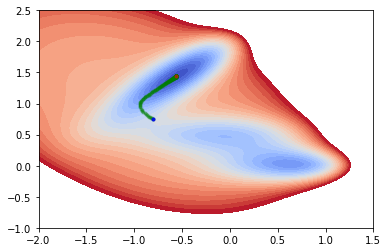

In [10]:
### 初期点からの最急降下経路の図示
plt.plot(xc_list, yc_list, 'g.-', alpha=0.3)            # trajectory
plt.plot(xc_list[0], yc_list[0], 'b.-', alpha=0.8)      # initial point
plt.plot(xc_list[-1], yc_list[-1], 'r.-', alpha=0.5)    # terminal point

# z軸のlevelを定義
level = []
for i in range(-15,10):
    level.append(10.0 * i)

# ポテンシャル面の描画
surf_x = np.linspace(-2.0, 1.5, 300)
surf_y = np.linspace(-1.0, 2.5, 300)
xmesh, ymesh = np.meshgrid(surf_x, surf_y)
surf_z = f(xmesh, ymesh)
cont = plt.contourf(surf_x, surf_y, surf_z, levels=level, cmap='coolwarm')
plt.show()

In [11]:
##############################################################
#                        ニュートン法                        #
##############################################################

In [12]:
### 初期設定
xc = -0.8; yc = 0.75      # 初期座標（＝初期構造）
xc_list = []; yc_list = []  # 座標を格納するリストを用意する
stepsize = 1.0   # STEP幅
maxitr = 10000  # 座標更新サイクルの上限回数

In [13]:
### ニュートン法による停留点の探索
for i in range(1, maxitr):
    diffx = fx(xc, yc)
    diffy = fy(xc, yc)
    if np.sqrt(diffx ** 2 + diffy ** 2) < 1e-10:  # gradientの大きさが10^(-10)未満のとき
        xc_list.append(xc)  # 座標をリストに追加
        yc_list.append(yc)
        times = i
        break
    else:        
        xc_list.append(xc)  # 座標をリストに追加
        yc_list.append(yc)
        
        det = fxx(xc, yc) * fyy(xc, yc) - fxy(xc, yc) ** 2                         # ヘシアンの行列式
        x_element = (fx(xc, yc) * fyy(xc, yc) - fy(xc, yc) * fxy(xc, yc)) / det    # ヘシアンの逆行列とグラジエントの積（x成分）
        y_element = (- fx(xc, yc) * fxy(xc, yc) + fxx(xc, yc) * fy(xc, yc)) / det  # ヘシアンの逆行列とグラジエントの積（y成分）
        xc = xc - stepsize * x_element  # 次の座標を生成･更新
        yc = yc - stepsize * y_element

In [14]:
### ニュートン法による最適化の結果を出力
print("Terminal point = (", xc, ",", yc,") , Iteration =", iteration)
print("Energy =", f(xc, yc), ", Gradient =", np.sqrt(diffx ** 2 + diffy ** 2))

Terminal point = ( -0.8220015587830566 , 0.6243128028186382 ) , Iteration = 532
Energy = -40.664843508657405 , Gradient = 0.0


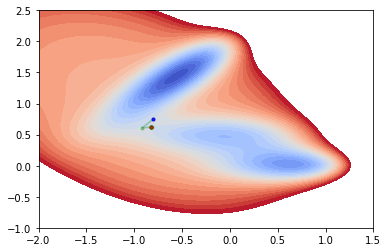

In [15]:
### 初期点からニュートン法で辿った経路の図示
plt.plot(xc_list, yc_list, 'g.-', alpha=0.3)            # trajectory
plt.plot(xc_list[0], yc_list[0], 'b.-', alpha=0.8)      # initial point
plt.plot(xc_list[-1], yc_list[-1], 'r.-', alpha=0.5)    # terminal point

# z軸のlevelを定義
level = []
for i in range(-15,10):
    level.append(10.0 * i)

# ポテンシャル面の描画
surf_x = np.linspace(-2.0, 1.5, 300)
surf_y = np.linspace(-1.0, 2.5, 300)
xmesh, ymesh = np.meshgrid(surf_x, surf_y)
surf_z = f(xmesh, ymesh)
cont = plt.contourf(surf_x, surf_y, surf_z, levels=level, cmap='coolwarm')
plt.show()

In [16]:
### 以上、最急降下法とニュートン法を実装した。
### 
### ここで、同じ初期点でも到達する点が異なっていることに注意しよう。
### 最急降下法では極小点、ニュートン法では鞍点が得られている。
### 
### また、ニュートン法の収束性は初期値やステップ幅などのパラメータに大きく依存する。
### 各自でパラメータを変えて実行してみて欲しい。
### 
### ニュートン法はあくまで停留点を見つけ出すアルゴリズムであり、必ずしも極小点に到達するとは限らない。
### これを改善した手法として「準ニュートン法」がある。準ニュートン法ではセカント条件を満たすような近似ヘシアンが用いられる。
### これにより、勾配法のように適切な降下方向を選択しつつ、極小点付近ではニュートン法に匹敵する収束性を発揮する。

In [17]:
### 【課題】
### ① 初期点を変えることですべての極小点と鞍点を特定する。
### ② 鞍点において固有値と固有ベクトルを求めて虚の振動方向を特定する。
### ③ ②で求めた虚の振動方向に対して、最急降下法を用いて得られるIRC経路を図示する。
### ④ 以下の式で定義されるポテンシャル面についても同様に解析してみよう。

# def f(x, y):
#     # nabata potential 1
#     A=[0.1, 0.1, 0.1, 0.001]
#     a=[np.sin(x-2) + np.cos(y), np.sin(x-y) - np.cos(y), np.sin(y) + 3 * np.cos(x+y), x**2 + y**2 /6]
#     s = []
#     for i in range(4):
#         s.append(A[i]*np.exp(a[i]))
#     return sum(s)
